# `pandas`

This workshop's goal&mdash;which is facilitated by this Jupyter notebook&mdash;is to give attendees the confidence to use `pandas` in their research projects. Basic familiarity with Python *is* assumed.

`pandas` is designed to make it easier to work with structured data. Most of the analyses you might perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL). The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels."

If you're curious:

>The `pandas` name itself is derived from *panel data*, an econometrics term for multidimensional structured data sets, and *Python data analysis* itself. After getting introduced, you can consult the full [`pandas` documentation](http://pandas.pydata.org/pandas-docs/stable/).

To motivate this workshop, we'll work with example data and go through the various steps you might need to prepare data for analysis. You'll (hopefully) realize that doing this type of work is much more difficult using Python's built-in data structures.

### Table of Contents

1 - [The DataFrame](#section1)<br>

2 - [Rename, Index, and Slice](#section2)<br>

3 - [Data Analysis](#section3)<br>

4 - [Data Manipulation](#section4)<br>

5 - [Groupby](#section5)<br>

6 - [Concatenation & Joins](#section6)<br>

7- [Plotting](#section7)<br>

## 1. The DataFrame <a id="section1"/>
The data used in these examples is available in the following [GitHub repository](https://github.com/dlab-berkeley/introduction-to-pandas). If you've [cloned that repo](https://www.atlassian.com/git/tutorials/setting-up-a-repository/git-clone), which is the recommended approach, you'll have everything you need to run this notebook. Otherwise, you can download the data file(s) from the above link. (Note: this notebook assumes that the data files are in a directory named `data/` found within your current working directory.)

We plan on working with a variety of datasets ranging from unemployment statistics to happiness measures to pokemon attributes and more.

Let's begin by importing `pandas` using the conventional abbreviation.

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The `read_csv()` function in `pandas` allows us to easily import our data. By default, it assumes the data is comma-delimited. However, you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.). There are several parameters that you can specify. See the documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` returns a `DataFrame`.

Notice that we call `read_csv()` using the `pd` abbreviation from the import statement above.

In [344]:
unemployment = pd.read_csv('data/country_total.csv')

Great! You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first five rows. Passing an integer, $n$, to `.head()` returns that number of rows. 

In [345]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


DataFrames all have a method called `tail` that takes an integer as an argument and returns a new DataFrame. Before using `tail`, can you guess at what it does? Try using `tail`; was your guess correct?

In [346]:
unemployment.tail()

,country,seasonality,month,unemployment,unemployment_rate
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8
20795,uk,trend,2010.10,2455000,7.8


To find the number of rows, you can use the `shape` attribute.

In [347]:
unemployment.shape

(20796, 5)

There are 20,796 rows and 5 columns.

The `.info()` method is an incredibly useful diagnostic tool for when you're getting to know a new dataset.

In [348]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20796 entries, 0 to 20795
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            20796 non-null  object 
 1   seasonality        20796 non-null  object 
 2   month              20796 non-null  float64
 3   unemployment       20796 non-null  int64  
 4   unemployment_rate  19851 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 812.5+ KB


`.info()` tells us:
- Number of rows and columns
- The data type of each column and the tally of each datatype.
- The number of non-null values. If those numbers are less than the number of total rows then that column has null values.
- The size of the dataframe in kilobytes.

The attributes of `.columns` and `.dtypes` return the column names and data types.

In [349]:
#Column names
unemployment.columns

Index(['country', 'seasonality', 'month', 'unemployment', 'unemployment_rate'], dtype='object')

In [350]:
#Data types
unemployment.dtypes

country               object
seasonality           object
month                float64
unemployment           int64
unemployment_rate    float64
dtype: object

`read_csv` is [a very flexible method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html); it also allows us to import data using a URL as the file path. 

A csv file with data on world countries and their abbreviations is located at [https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv) (saved as a string variable `countries_url` below).

In [351]:
countries = pd.read_csv('https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'
)
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              30 non-null     object 
 1   google_country_code  30 non-null     object 
 2   country_group        30 non-null     object 
 3   name_en              30 non-null     object 
 4   name_fr              30 non-null     object 
 5   name_de              30 non-null     object 
 6   latitude             30 non-null     float64
 7   longitude            30 non-null     float64
dtypes: float64(2), object(6)
memory usage: 2.0+ KB


## 2. Rename, Indexing, Dropping, and Slicing <a id="section2"/>
Back to the entire unemployment data set. You may have noticed that the `month` column also includes the year. Let's go ahead and rename it.

In [352]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


In [353]:
unemployment.rename(columns={'month' : 'year_month'}, inplace=True)

The `.rename()` method allows you to modify index labels and/or column names. As you can see, we passed a `dict` to the `columns` parameter, with the original name as the key and the new name as the value. Importantly, we also set the `inplace` parameter to `True`, which modifies the *actual* `DataFrame`, not a copy of it.

To select a single column we can either use bracket (`[]`) or dot notation (referred to as *attribute access*).

In [354]:
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

In [355]:
unemployment.year_month.head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64

It is preferrable to use the bracket notation as a column name might inadvertently have the same name as a `DataFrame` (or `Series`) method. In addition, only bracket notation can be used to create a new column. If you try and use attribute access to create a new column, you'll create a new attribute, *not* a new column.

When selecting a single column, we have a `pandas` `Series` object, which is a single vector of data (e.g., a NumPy array) with "an associated array of data labels, called its *index*." A `DataFrame` also has an index. In our example, the indices are an array of sequential integers, which is the default. You can find them in the left-most position, without a column label.

Indices need not be a sequence of integers. They can, for example, be dates or strings. Note that indices do *not* need to be unique.

We can select multiple columns by effectively slicing the dataframe with a list of columns

In [356]:
unemployment[["year_month", "unemployment"]].head()

,year_month,unemployment
0,1993.01,171000
1,1993.02,175000
2,1993.03,166000
3,1993.04,157000
4,1993.05,147000


Deleting columns is done with the `.drop()` method. **This method is used for the index and columns** therefore we must specify `axis = 1` to tell pandas to drop a column.

In [357]:
unemployment.drop("unemployment", axis = 1).head()

,country,seasonality,year_month,unemployment_rate
0,at,nsa,1993.01,4.5
1,at,nsa,1993.02,4.6
2,at,nsa,1993.03,4.4
3,at,nsa,1993.04,4.1
4,at,nsa,1993.05,3.9


In [358]:
#Multiple columns
unemployment.drop(["unemployment", "seasonality"], axis = 1).head()

,country,year_month,unemployment_rate
0,at,1993.01,4.5
1,at,1993.02,4.6
2,at,1993.03,4.4
3,at,1993.04,4.1
4,at,1993.05,3.9


This change isn't permanent because `inplace=False`. 

In [359]:
#Permanently drop a column
#unemployment.drop("unemployment", axis = 1, inplace=True)

Look at a few more useful ways to index data&mdash;that is, select rows.

`.loc` primarily works with string labels. It accepts a single label, a list (or array) of labels, or a slice of labels (e.g., `'a' : 'f'`).

Let's create a `DataFrame` to see how this works. (This is based on an [example](https://github.com/fonnesbeck/scipy2015_tutorial/blob/master/notebooks/1.%20Data%20Preparation.ipynb) from Chris Fonnesbeck's [Computational Statistics II Tutorial](https://github.com/fonnesbeck/scipy2015_tutorial).)

In [360]:
bacteria = pd.DataFrame({'bacteria_counts' : [632, 1638, 569, 115],
                         'other_feature' : [438, 833, 234, 298]},
                         index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

Notice that we pass in a `dict`, where the keys correspond to column names and the values to the data. In this example, we've also set the indices&mdash;strings in this case&mdash;to be the taxon of each bacterium.

In [361]:
bacteria

,bacteria_counts,other_feature
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


Now, if we're interested in the values (row) associated with "Actinobacteria," we can use `.loc` and the index name.

In [362]:
bacteria.loc['Actinobacteria']

bacteria_counts    569
other_feature      234
Name: Actinobacteria, dtype: int64

This returns the column values for the specified row. Interestingly, we could have also used "positional indexing," even though the indices are strings.

In [363]:
bacteria[2:3]

,bacteria_counts,other_feature
Actinobacteria,569,234


The difference is that the former returns a `Series` because we selected a single lable, while the latter returns a `DataFrame` because we selected a range of positions.

Let's return to our unemployment data. Another indexing option, `.iloc`, primarily works with integer positions. To select specific rows, we can do the following.

In [364]:
unemployment.iloc[[1, 5, 6, 9]]

,country,seasonality,year_month,unemployment,unemployment_rate
1,at,nsa,1993.02,175000,4.6
5,at,nsa,1993.06,134000,3.5
6,at,nsa,1993.07,128000,3.4
9,at,nsa,1993.10,141000,3.7


We can select a range of rows and specify the step value.

In [365]:
unemployment.iloc[25:50:5]

,country,seasonality,year_month,unemployment,unemployment_rate
25,at,nsa,1995.02,174000,4.5
30,at,nsa,1995.07,123000,3.3
35,at,nsa,1995.12,175000,4.7
40,at,nsa,1996.05,159000,4.3
45,at,nsa,1996.10,146000,3.9


(Note: As is typical in Python, the end position is not included. Therefore, we don't see the row associated with the index 50.)

Indexing is important. You'll use it a lot. Below, we'll show how to index based on data values.



The "other_feature" column in our `bacteria` table isn't very descriptive. Suppose we know that "other_feature" refers to a second set of bacteria count observations. Use the `rename` method to give "other_feature" a more descriptive name.

In [366]:
# rename "other_feature" in bacteria
bacteria.rename(columns={'other_feature':'second_count'}, inplace=True)
bacteria

,bacteria_counts,second_count
Firmicutes,632,438
Proteobacteria,1638,833
Actinobacteria,569,234
Bacteroidetes,115,298


### Challenge 1A: Indexing to get a specific value

Both `loc` and `iloc` can be used to select a particular value if they are given two arguments. The first argument is the name (when using `loc`) or index number (when using `iloc`) of the *row* you want, while the second argument is the name or index number of the *column* you want.

Using `loc`, select "Bacteroidetes" and "bacteria_counts" to get the count of Bacteroidetes.

In [367]:
bacteria.loc['Bacteroidetes', 'bacteria_counts']

115

How could you do the same task using `iloc`?

In [368]:
bacteria.iloc[3,0]

115

In [369]:
bacteria[3:4]['bacteria_counts']

Bacteroidetes    115
Name: bacteria_counts, dtype: int64

### Challenge 1B: Indexing multiple rows and columns

Both `loc` and `iloc` can be used to select subsets of columns *and* rows at the same time if they are given lists (and/or slices, for `iloc`] as their two arguments. 

Using `iloc` on the `unemployment` DataFrame, get:
* every row starting at row 4 and ending at row 7
* the 0th, 2nd, and 3rd columns

In [370]:
unemployment.iloc[3:7,[0,2,3]]

,country,year_month,unemployment
3,at,1993.04,157000
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000


Repeat same task but with `loc`

In [371]:
unemployment.loc[3:7,['country', 'year_month', 'unemployment']]

,country,year_month,unemployment
3,at,1993.04,157000
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000
7,at,1993.08,130000


Uh-oh, those are different! Why? Because using slices in `.loc` treats the end position in the slice inclusively, while slicing with `.iloc` (and on the dataframe itself!) treats the end position in the slice exclusively (as Python lists and `numpy` does).

So, we need to do this:

In [372]:
unemployment.loc[3:6,['country', 'year_month', 'unemployment']]

,country,year_month,unemployment
3,at,1993.04,157000
4,at,1993.05,147000
5,at,1993.06,134000
6,at,1993.07,128000


### Boolean Indexing or Conditional Filtering 
Suppose we wanted to construct a dataframe for a specific country and above a certain unemployment rate threshold

**Task**: Return a dataframe where the unemployment rate is greater than 9.0 for the country of France?

- Step 1: Grab rows belonging to France
- Step 2: Grab rows where unemployment rate is greater than 9.0%
- Step 3: Use the two conditions to filter or index the `unemployment` dataframe.

In [373]:
#select unemployment rate and country columns
unemployment_rate = unemployment.unemployment_rate
country = unemployment.country

In [374]:
#create a boolean mask for un rate
unemployment_rate>9.0

0        False
1        False
2        False
3        False
4        False
         ...  
20791    False
20792    False
20793    False
20794    False
20795    False
Name: unemployment_rate, Length: 20796, dtype: bool

The mask produces an array of boolean values equal to the length of the original dataframe

In [375]:
#create boolean mask for country
country == 'fr'

0        False
1        False
2        False
3        False
4        False
         ...  
20791    False
20792    False
20793    False
20794    False
20795    False
Name: country, Length: 20796, dtype: bool

First let's filter the `unemployment_rate` series using our threshold of 9.0

In [376]:
#We pass in the boolean mask like we're slicing the dataframe
unemployment[unemployment_rate>9]

,country,seasonality,year_month,unemployment,unemployment_rate
648,be,nsa,1983.01,404000,10.6
649,be,nsa,1983.02,402000,10.5
650,be,nsa,1983.03,396000,10.4
651,be,nsa,1983.04,389000,10.2
652,be,nsa,1983.05,383000,10.1
...,...,...,...,...,...
20598,uk,trend,1994.05,2663000,9.5
20599,uk,trend,1994.06,2642000,9.4
20600,uk,trend,1994.07,2611000,9.3
20601,uk,trend,1994.08,2574000,9.2


This returns a dataframe where value under unemployment rate is greater than 9.0.

In [377]:
#Country version using france
unemployment[country=='fr']

,country,seasonality,year_month,unemployment,unemployment_rate
6831,fr,nsa,1983.01,1834000,7.8
6832,fr,nsa,1983.02,1807000,7.7
6833,fr,nsa,1983.03,1754000,7.4
6834,fr,nsa,1983.04,1705000,7.2
6835,fr,nsa,1983.05,1680000,7.1
...,...,...,...,...,...
7834,fr,trend,2010.08,2835000,9.7
7835,fr,trend,2010.09,2833000,9.7
7836,fr,trend,2010.10,2831000,9.7
7837,fr,trend,2010.11,2842000,9.7


Now let's combine the two!

In [378]:
#Wrap both boolean masks in parentheses and use an & sign to make their conditions exclusive
unemployment[(unemployment.unemployment_rate>9.0) & (unemployment.country == 'fr')]

,country,seasonality,year_month,unemployment,unemployment_rate
6844,fr,nsa,1984.02,2168000,9.1
6845,fr,nsa,1984.03,2169000,9.1
6851,fr,nsa,1984.09,2267000,9.2
6852,fr,nsa,1984.10,2401000,9.9
6853,fr,nsa,1984.11,2438000,10.0
...,...,...,...,...,...
7834,fr,trend,2010.08,2835000,9.7
7835,fr,trend,2010.09,2833000,9.7
7836,fr,trend,2010.10,2831000,9.7
7837,fr,trend,2010.11,2842000,9.7


### Challenge 2: Slicing Census Data

Using the pre-loaded the census dataset featuring a collection of US counties and their socio-economic attribues, answer the following questions 

- Create a subset dataframe using loc containing the following columns: State, County, WorkAtHome, MeanCommute
- Create a dataframe of counties exclusively from each of the following counties: Kansas, Maryland, Oregon
- How many counties in California have a total population greater than 250000

In [379]:
census = pd.read_csv("data/census_data.csv")
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [380]:
census_subset = census[["State", "County", "WorkAtHome", "MeanCommute"]]
census_subset.head()

,State,County,WorkAtHome,MeanCommute
0,Alabama,Autauga,1.8,26.5
1,Alabama,Baldwin,3.9,26.4
2,Alabama,Barbour,1.6,24.1
3,Alabama,Bibb,0.7,28.8
4,Alabama,Blount,2.3,34.9


In [381]:
kansas = census[census.State == "Kansas"]
maryland = census[census.State == "Maryland"]
oregon = census[census.State == "Oregon"]

In [382]:
census[(census.State == "California") & (census.TotalPop >= 250000)].shape[0]

26

## 3. Data Analysis <a id="section3"/>

Pandas is great for conducting exploratory data analysis. We need to find a the mean of a column or count the proportions of a categorical variable's items, pandas is your go-to tool. 

Let's introduce a new dataset: movies

In [383]:
path = "data/movies.csv"

In [384]:
movies = pd.read_csv(path)
movies.head()

,Rank,Title,Description,Director,Actors,Year,Runtime Minutes,Rating,Votes,Production Budget,Revenue Millions,Metascore,Genre1,Genre2,Genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270.32,59.0,Animation,Comedy,Family
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325.02,40.0,Action,Adventure,Fantasy
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45.13,42.0,Action,Adventure,Fantasy


In [385]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               650 non-null    int64  
 1   Title              650 non-null    object 
 2   Description        650 non-null    object 
 3   Director           650 non-null    object 
 4   Actors             650 non-null    object 
 5   Year               650 non-null    int64  
 6   Runtime Minutes    650 non-null    int64  
 7   Rating             650 non-null    float64
 8   Votes              650 non-null    int64  
 9   Production Budget  650 non-null    int64  
 10  Revenue Millions   635 non-null    float64
 11  Metascore          622 non-null    float64
 12  Genre1             650 non-null    object 
 13  Genre2             612 non-null    object 
 14  Genre3             487 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 76.3+ KB


Before we move ahead let's fix the column names

In [386]:
#Use the str operator to lower case the column names and replace the spaces with an underscore
movies.columns = movies.columns.str.lower().str.replace(" ", "_")
movies.head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270.32,59.0,Animation,Comedy,Family
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325.02,40.0,Action,Adventure,Fantasy
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45.13,42.0,Action,Adventure,Fantasy


To generate a set of summary stats call the `.describe()` method

In [387]:
movies.describe()

,rank,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore
count,650.00000,650.000000,650.000000,650.000000,6.500000e+02,6.500000e+02,635.000000,622.000000
mean,325.50000,2012.150769,116.489231,6.794308,2.207926e+05,7.171900e+07,100.509638,58.122186
std,187.78312,3.201315,18.178978,0.890256,2.016583e+05,6.285016e+07,103.665885,16.813781
min,1.00000,2006.000000,80.000000,1.900000,5.520000e+02,9.500000e+06,0.050000,11.000000
25%,163.25000,2010.000000,103.000000,6.300000,8.479700e+04,2.500000e+07,31.155000,46.000000
50%,325.50000,2013.000000,114.000000,6.800000,1.689790e+05,4.775000e+07,64.060000,58.000000
75%,487.75000,2015.000000,126.000000,7.475000,2.984842e+05,1.000000e+08,136.705000,70.000000
max,650.00000,2016.000000,191.000000,9.000000,1.791916e+06,3.790000e+08,760.510000,96.000000


You may have noticed that the "count" is lower for certain columns. This is because the summary statistics are based on *non-missing* values and count reflects that.

The values depend on what it's called on. If the `DataFrame` includes both numeric and object (e.g., strings) `dtype`s, it will default to summarizing the numeric data. If `describe` is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count.

In [388]:
#describe works on series too
movies.rating.describe()

count    650.000000
mean       6.794308
std        0.890256
min        1.900000
25%        6.300000
50%        6.800000
75%        7.475000
max        9.000000
Name: rating, dtype: float64

In [389]:
#mean, median
movies.rating.mean(), movies.rating.median()

(6.794307692307691, 6.8)

What if you're interested in knowing what are the best or worst rated movies?

The `nlargest` and `nsmallest` methods can be of assistance.

In [390]:
#Show the 5 best films
movies.rating.nlargest()

35    9.0
57    8.8
83    8.8
25    8.6
42    8.5
Name: rating, dtype: float64

The `n` parameter's default is set to 5. 

However we only see the `rating` values and not the movie titles associated with them. 


Using `nlargest` with the `columns` parameter set to `ratigin` on `movies` to achieve this.

In [391]:
#Dataframe version of .nlargest()
movies.nlargest(n = 5, columns="rating")[["title", "rating"]]

,title,rating
35,The Dark Knight,9.0
57,Inception,8.8
83,Dangal,8.8
25,Interstellar,8.6
42,The Prestige,8.5


Conversely we can use `nsmallest` to output the worst films.

In [392]:
#Dataframe version of .nlargest()
movies.nsmallest(n = 5, columns="rating")[["title", "rating"]]

,title,rating
546,Disaster Movie,1.9
569,Dragonball Evolution,2.7
160,The Disappointments Room,3.9
362,Birth of the Dragon,3.9
41,Fifty Shades of Grey,4.1


The `movies` dataset has some interesting categorical data that we should examine as well.

Let's find out what the various genres are at our disposal.

In [393]:
g_type = movies.genre1

In [394]:
#Show the unique pokemon types
g_type.unique()

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Biography', 'Drama',
       'Crime', 'Mystery', 'Horror', 'Sci-Fi', 'Fantasy', 'Romance'],
      dtype=object)

In [395]:
#Number of uniques
g_type.nunique()

12

The `value_counts` method can tell us how the frequencies of each genre.

In [396]:
g_type.value_counts()

Action       247
Comedy        97
Drama         91
Adventure     57
Biography     46
Animation     44
Crime         43
Horror        13
Mystery        7
Fantasy        3
Sci-Fi         1
Romance        1
Name: genre1, dtype: int64

What if we're interested in proportions? Set the `normalize` parameter to `True` in the `value_counts`.

In [397]:
g_type.value_counts(normalize = True).round(2)

Action       0.38
Comedy       0.15
Drama        0.14
Adventure    0.09
Biography    0.07
Animation    0.07
Crime        0.07
Horror       0.02
Mystery      0.01
Fantasy      0.00
Sci-Fi       0.00
Romance      0.00
Name: genre1, dtype: float64

A common task for exploratory data analysis is looking at the correlations in your dataset. I'm interested to see if there a number of similar attributes in the dataset. 

We can use the `corr` method to return a table of all the correlations between pairs of numerical columns.

In [398]:
movies.corr()

,rank,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore
rank,1.000000,-0.333689,-0.274296,-0.280972,-0.324932,-0.210333,-0.277772,-0.231238
year,-0.333689,1.000000,-0.085941,-0.160378,-0.299952,-0.026334,-0.061315,-0.136954
runtime_minutes,-0.274296,-0.085941,1.000000,0.362170,0.398036,0.316672,0.241962,0.257466
rating,-0.280972,-0.160378,0.362170,1.000000,0.566135,0.065416,0.265500,0.718664
votes,-0.324932,-0.299952,0.398036,0.566135,1.000000,0.399216,0.616704,0.439823
production_budget,-0.210333,-0.026334,0.316672,0.065416,0.399216,1.000000,0.628123,0.014072
revenue_millions,-0.277772,-0.061315,0.241962,0.265500,0.616704,0.628123,1.000000,0.244527
metascore,-0.231238,-0.136954,0.257466,0.718664,0.439823,0.014072,0.244527,1.000000


In [399]:
#What are all the correlations for the revenue_millions column?
movies.corr()["revenue_millions"]


rank                -0.277772
year                -0.061315
runtime_minutes      0.241962
rating               0.265500
votes                0.616704
production_budget    0.628123
revenue_millions     1.000000
metascore            0.244527
Name: revenue_millions, dtype: float64

In [400]:
#Whats the correlation between rating and revenue_millions?
movies.corr().loc["rating", "revenue_millions"]

0.26549981017314617

### Challenge 3: Analyzing Census Data

Using the census data we imported earlier, complete the following tasks.
- How many counties does each state have?
- What are the average and standard deviation for county population
- What columns have the highest correlations with poverty?

In [401]:
census.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [402]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [403]:
#Task1
census.State.value_counts().head()

Texas       254
Georgia     159
Virginia    133
Kentucky    120
Missouri    115
Name: State, dtype: int64

In [404]:
#Task2
census.TotalPop.mean(), census.TotalPop.std()

(99409.34596273291, 319305.45373083575)

In [405]:
#Task3
census.corr()["Poverty"].nlargest()

Poverty         1.000000
ChildPoverty    0.932480
Unemployment    0.712344
Hispanic        0.482186
Service         0.400369
Name: Poverty, dtype: float64

## 4. Manipulating Data <a id="section4"/>

The vast majority of work done with data consists of cleaning, transforming, and other forms reshaping it to your needs. More often than not data you receive will have missing values (nulls), come in an unfriendly format, and have misspelled labels.

Data preparation is a necessary pre-requisite to tasks such as data visualization and machine learning. A machine learning model can't process missing or non-numerical data, so it's incumbent on you to feed prep your data for the model.

Luckily for us, pandas has provides relatively easy and intuitive tools which we can use to reconfigure our data.

#### Sorting

We touched on the idea of ordering data earlier with `nlargest` and `nsmallest` but sometimes we may need to turn to `sort_values` for permantently ordering data or sorting by multiple columns.

The `ascending` parameter defaults to `True` which means it orders data from least to greatest. Set it to `False` to to reverse that order. 

In [406]:
#Series version
movies.production_budget.sort_values()

83       9500000
368      9900000
515     10000000
297     10000000
518     10000000
         ...    
39     263000000
270    263700000
124    300000000
69     365000000
30     379000000
Name: production_budget, Length: 650, dtype: int64

In [407]:
#Dataframe version
movies.sort_values(by = "production_budget").head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
83,84,Dangal,Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,9500000,11.15,NaN,Action,Biography,Drama
368,369,Friend Request,When a college student unfriends a mysterious ...,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",2016,92,5.4,12758,9900000,64.03,59.0,Horror,Thriller,NaN
515,516,The Man Who Knew Infinity,The story of the life and academic career of t...,Matt Brown,"Dev Patel, Jeremy Irons, Malcolm Sinclair, Rag...",2015,108,7.2,29912,10000000,3.86,NaN,Biography,Drama,NaN
297,298,The Purge: Election Year,Former Police Sergeant Barnes becomes head of ...,James DeMonaco,"Frank Grillo, Elizabeth Mitchell, Mykelti Will...",2016,109,6.0,54216,10000000,79.00,NaN,Action,Horror,Sci-Fi
518,519,Max Steel,The adventures of teenager Max McGrath and his...,Stewart Hendler,"Ben Winchell, Josh Brener, Maria Bello, Andy G...",2016,92,4.6,11555,10000000,3.77,22.0,Action,Adventure,Family


How can we make this sorting permanent?

In [408]:
#Set inplace equal to True
movies.sort_values(by = "rating", inplace=True)

Remember that whenever you use `inplace=True` you won't see an output.

In [409]:
#View sorted dataframe
movies.head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
546,547,Disaster Movie,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,20000000,14.17,15.0,Comedy,NaN,NaN
569,570,Dragonball Evolution,The young warrior Son Goku sets out on a quest...,James Wong,"Justin Chatwin, James Marsters, Yun-Fat Chow, ...",2009,85,2.7,59512,30000000,9.35,45.0,Action,Adventure,Fantasy
160,161,The Disappointments Room,A mother and her young son release unimaginabl...,D.J. Caruso,"Kate Beckinsale, Mel Raido, Duncan Joiner, Luc...",2016,85,3.9,4895,15000000,2.41,31.0,Drama,Horror,Thriller
362,363,Birth of the Dragon,"Young, up-and-coming martial artist, Bruce Lee...",George Nolfi,"Billy Magnussen, Terry Chen, Teresa Navarro,Va...",2016,103,3.9,552,31000000,93.05,61.0,Action,Biography,Drama
41,42,Fifty Shades of Grey,Literature student Anastasia Steele's life cha...,Sam Taylor-Johnson,"Dakota Johnson, Jamie Dornan, Jennifer Ehle,El...",2015,125,4.1,244474,40000000,166.15,46.0,Drama,Romance,Thriller


The index can also be sorted, which we can do to actually undo the previous action.

In [410]:
movies.sort_index(inplace=True)

In [411]:
#View change
movies.head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270.32,59.0,Animation,Comedy,Family
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325.02,40.0,Action,Adventure,Fantasy
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45.13,42.0,Action,Adventure,Fantasy


Now let's sort by multiple columns

In [412]:
#Initialize column list
cols = ["year", "runtime_minutes"]
#Sort data from least to greatest first by year and then by runtime
movies.sort_values(by = cols, ascending=True)[cols]

,year,runtime_minutes
597,2006,95
513,2006,96
547,2006,102
211,2006,104
218,2006,104
...,...,...
21,2016,144
24,2016,147
39,2016,151
36,2016,161


The above `DataFrame` sorts primarily with `year` and in the case of ties then defers to `runtime_minutes` as its sorting criteria.

We can also feed in a list of boolean values to `ascending` if for instance we'd like to use different orders.

In [413]:
#Sort data from greatest to least by year and then least to greatest by runtime
movies.sort_values(by = cols, ascending=[False, True])[cols]

,year,runtime_minutes
619,2016,80
160,2016,85
97,2016,86
11,2016,87
225,2016,87
...,...,...
119,2006,144
603,2006,147
490,2006,149
71,2006,151


### Null Values

Pandas marks missing data or null data as "NaN" which stands for "Not a Number." To find these null values we use the `.isnull()` method. This function returns a corresponding boolean value for each value in a `Series` or `DataFrame`.

In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus we can sum up all the values in the boolean mask with `.sum()` to give us a count for the *total* number of missing values.

In [414]:
movies.genre3.tail()

645    Romance
646     Horror
647        NaN
648    Mystery
649    Fantasy
Name: genre3, dtype: object

In [415]:
#Return isnull boolean mask
movies.genre3.isnull().tail()

645    False
646    False
647     True
648    False
649    False
Name: genre3, dtype: bool

In [416]:
#Return number of missing values in genre3
movies.genre3.isnull().sum()

163

In [417]:
#Number of missing values for every column
movies.isnull().sum()

rank                   0
title                  0
description            0
director               0
actors                 0
year                   0
runtime_minutes        0
rating                 0
votes                  0
production_budget      0
revenue_millions      15
metascore             28
genre1                 0
genre2                38
genre3               163
dtype: int64

In [418]:
#Using .mean() effectively tells us the percent of null values in each column
movies.isnull().mean().round(2)

rank                 0.00
title                0.00
description          0.00
director             0.00
actors               0.00
year                 0.00
runtime_minutes      0.00
rating               0.00
votes                0.00
production_budget    0.00
revenue_millions     0.02
metascore            0.04
genre1               0.00
genre2               0.06
genre3               0.25
dtype: float64

Since `.isnull()` outputs a boolean mask, we can use that array to conditionally filter the `Dataframe`.

In [419]:
movies[movies.genre3.isnull()].head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
13,14,Jason Bourne,The CIA's most dangerous former operative is d...,Paul Greengrass,"Matt Damon, Tommy Lee Jones, Alicia Vikander,V...",2016,123,6.7,150823,120000000,162.16,58.0,Action,Thriller,NaN
14,15,Lion,A five-year-old Indian boy gets lost on the st...,Garth Davis,"Dev Patel, Nicole Kidman, Rooney Mara, Sunny P...",2016,118,8.1,102061,12000000,51.69,69.0,Biography,Drama,NaN
18,19,Bad Moms,When three overworked and under-appreciated mo...,Jon Lucas,"Mila Kunis, Kathryn Hahn, Kristen Bell,Christi...",2016,100,6.2,66540,20000000,113.08,60.0,Comedy,NaN,NaN
19,20,Why Him?,A holiday gathering threatens to go off the ra...,John Hamburg,"Zoey Deutch, James Franco, Tangie Ambrose,Cedr...",2016,111,6.3,48123,38000000,60.31,39.0,Comedy,NaN,NaN
20,21,Nocturnal Animals,A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016,116,7.5,126030,22500000,10.64,67.0,Drama,Thriller,NaN


The output above returns a `DataFrame` of every row every where `genre3` has a NaN. If we want to filter out NaNs under that column place `~` at the start of the condition.

In [420]:
movies[~movies.genre3.isnull()].head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270.32,59.0,Animation,Comedy,Family
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325.02,40.0,Action,Adventure,Fantasy
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45.13,42.0,Action,Adventure,Fantasy


A more formal way to get rid of nulls is to use `.dropna()`.

In [421]:
movies.genre3.dropna()

0       Sci-Fi
1       Sci-Fi
2       Family
3      Fantasy
4      Fantasy
        ...   
644    History
645    Romance
646     Horror
648    Mystery
649    Fantasy
Name: genre3, Length: 487, dtype: object

In [422]:
#DataFrame version
movies.dropna(subset=["genre3"])

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333.13,76.0,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126.46,65.0,Adventure,Mystery,Sci-Fi
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270.32,59.0,Animation,Comedy,Family
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325.02,40.0,Action,Adventure,Fantasy
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45.13,42.0,Action,Adventure,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,Selma,A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,20000000,52.07,NaN,Biography,Drama,History
645,646,Take Me Home Tonight,"Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,19000000,6.92,NaN,Comedy,Drama,Romance
646,647,Resident Evil: Afterlife,While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,57500000,60.13,37.0,Action,Adventure,Horror
648,649,Secret in Their Eyes,"A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,20000000,NaN,45.0,Crime,Drama,Mystery


**If we wanted to permanently drop nulls what do you guess would be the way to do so?**

If you said `inplace=True` then you're right!!!

In [423]:
# movies.dropna(subset=['genre3'], inplace=True)

Now `movies` has no NaNs under the `genre3` column.

Sometimes we may not want to get rid of nulls but rather replace them with our own preferred value. This is what's referred to as imputation. It's a technique typically used in machine learning to "save" data that missing data by replacing NaNs with an estimated value — a mean typically used.

`.fillna()` replaces nulls with an input value.

In [424]:
#Replace the missing metascore values with its mean
meta_mean = movies.metascore.mean()
movies.metascore.fillna(meta_mean)

0      76.000000
1      65.000000
2      59.000000
3      40.000000
4      42.000000
         ...    
645    58.122186
646    37.000000
647    48.000000
648    45.000000
649    11.000000
Name: metascore, Length: 650, dtype: float64

How can we go about replacing the missing `genre2` and `genre3` values with a string that says "no_genre"?

In [425]:
repl = "no_genre"
movies.genre2.fillna(repl)

0      Adventure
1        Mystery
2         Comedy
3      Adventure
4      Adventure
         ...    
645        Drama
646    Adventure
647     no_genre
648        Drama
649       Family
Name: genre2, Length: 650, dtype: object

In [426]:
movies.genre3.fillna(repl)

0        Sci-Fi
1        Sci-Fi
2        Family
3       Fantasy
4       Fantasy
         ...   
645     Romance
646      Horror
647    no_genre
648     Mystery
649     Fantasy
Name: genre3, Length: 650, dtype: object

### Changing Data Types

There are instances where data is not encoded in the right way. For instance, numerical data such as dollars and percents presented as strings. 

In [427]:
#Create fake dataframe 
percent_sales = pd.DataFrame({"percents":["30.2", "97.5", "61.0"],
                               "revenue": ["$3438", "$2393", "$1892"]})
percent_sales

,percents,revenue
0,30.2,$3438
1,97.5,$2393
2,61.0,$1892


In [428]:
#View data types
percent_sales.dtypes

percents    object
revenue     object
dtype: object

Changing the type of `percents` can be done with `.astype()` and passing in "float" as the desired data type

In [429]:
percent_sales.percents.astype(float)

0    30.2
1    97.5
2    61.0
Name: percents, dtype: float64

`.astype()` does not has `inplace=True` so to make it permanent, we overwrite the column. 

In [430]:
percent_sales["percents"] = percent_sales.percents.astype(float)

Now revenue's turn.

In [431]:
percent_sales.revenue.astype(float)

ValueError: could not convert string to float: '$3438'

We get an error! 

That's because of the pesky $ signs. We can only convert string representations of numbers to floats, not non-numerical characters.

This necessitates removing the $ sign which introduces us to `.str` which is essentially a method allows us to use typical string methods such as `.lower()` and `.title()` on `Series`.

We first call `.str` then `.replace()` which we use to get rid of the $ signs.

In [432]:
percent_sales.revenue.str.replace("$", "")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    3438
1    2393
2    1892
Name: revenue, dtype: object

Now we can convert "revenue" to a float.

In [433]:
percent_sales.revenue.str.replace("$", "").astype(float)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    3438.0
1    2393.0
2    1892.0
Name: revenue, dtype: float64

Go back to the unemployment data

In [434]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


We need to **split `year_month` into two separate columns.** Above, we saw that this column is type (technically, `dtype`) `float64`. We can extract the year using with `.astype()` method. This allows for type casting&mdash;basically converting from one type to another. We'll then subtract this value from `year_month`&mdash;to get the decimal portion of the value&mdash;and multiply the result by 100 and convert to `int`.

In [435]:
unemployment['year'] = unemployment['year_month'].astype(int)

In this case, we're casting the floating point values to integers. In Python, this [truncates the decimals](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

Finally, let's create our **month** variable as described above. (Because of the truncating that occurs when casting to `int`, we first round the values to the nearest whole number.)

In [436]:
unemployment['month'] = ((unemployment['year_month'] - unemployment['year']) * 100).round(0).astype(int)
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5


### Inter Column operations

The great thing about data is that you create more data from what it's in front of you.

This dataset is missing some important information such as the profit line of each film. The good news is we can derive those numbers from what we have in front of us.

Let's derive the profit figures for our set of films. First thing we need to do is fix the revenue column

In [437]:
#Multiple revenue_millions by a million
movies["revenue_millions"] *= 1_000_000

In [438]:
#Create a new column in movies called profit by subtracting production_budget from revenue_millions
movies["profit"] = movies["revenue_millions"] - movies["production_budget"]
movies.head()

,rank,title,description,director,actors,year,runtime_minutes,rating,votes,production_budget,revenue_millions,metascore,genre1,genre2,genre3,profit
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,170000000,333130000.0,76.0,Action,Adventure,Sci-Fi,163130000.0
1,2,Prometheus,"Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,125000000,126460000.0,65.0,Adventure,Mystery,Sci-Fi,1460000.0
2,3,Sing,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,75000000,270320000.0,59.0,Animation,Comedy,Family,195320000.0
3,4,Suicide Squad,A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,175000000,325020000.0,40.0,Action,Adventure,Fantasy,150020000.0
4,5,The Great Wall,European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,150000000,45130000.0,42.0,Action,Adventure,Fantasy,-104870000.0


### Challenge 4

Time for some pokemon data analysis. Using the `pokemon` dataset complete the following tasks

- What are the 10 pokemon with the highest and lowest hp values? Show just the name
- Which 3 columns have the most null values?
- Create a new column that represents `height_m` in inches. Reminder: There 39.37 inches in a meter.
- What are is the average speed for pokemon that are marked as 1 and 0 under `is_legendary`

In [439]:
pokemon = pd.read_csv("data/pokemon.csv")
pokemon.head()

,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [440]:
#Task1 
pokemon.nlargest(10, columns=["hp"])['name']

241      Blissey
112      Chansey
798     Guzzlord
717      Zygarde
201    Wobbuffet
320      Wailord
593    Alomomola
142      Snorlax
288      Slaking
425     Drifblim
Name: name, dtype: object

In [441]:
pokemon.nsmallest(10, columns=["hp"])['name']

291     Shedinja
49       Diglett
128     Magikarp
171        Pichu
212      Shuckle
348       Feebas
354      Duskull
438     Mime Jr.
62          Abra
80     Magnemite
Name: name, dtype: object

In [442]:
#Task2
pokemon.isnull().sum().nlargest(3)

type2              384
percentage_male     98
height_m            20
dtype: int64

In [443]:
#Task3
pokemon['height_inches'] = pokemon.height_m*39.37
pokemon.height_inches.head()

0    27.559
1    39.370
2    78.740
3    23.622
4    43.307
Name: height_inches, dtype: float64

In [444]:
#Task4
pokemon[pokemon.is_legendary == 1].speed.mean()

95.42857142857143

In [445]:
pokemon[pokemon.is_legendary == 0].speed.mean()

63.548563611491105

## 5. Groupby  <a id="section5"/>


What if we'd like to apply certain operations based on a categorization of data? For instance deriving the average rating value for each film genre?

In other words we need to *group* the films *by* their genre designation.

Which we can do with the `.groupby()` method.

In [446]:
#Calculate the average rating by genre.
movies.groupby("genre1").rating.mean()

genre1
Action       6.602834
Adventure    7.028070
Animation    7.238636
Biography    7.378261
Comedy       6.327835
Crime        7.102326
Drama        7.078022
Fantasy      6.733333
Horror       6.176923
Mystery      7.285714
Romance      7.100000
Sci-Fi       5.000000
Name: rating, dtype: float64

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by generation;that's what goes in the parentheses. Next, we need to tell it what column we'd like to perform the `.mean()` operation on. In this case, it's the `rating` attribute.

In [447]:
#Repeat but with .describe()
movies.groupby("genre1").rating.describe()

,count,mean,std,min,25%,50%,75%,max
genre1,,,,,,,,
Action,247.0,6.602834,0.884207,2.7,6.00,6.6,7.100,9.0
Adventure,57.0,7.028070,0.794570,4.9,6.30,7.2,7.600,8.6
Animation,44.0,7.238636,0.675559,5.7,6.70,7.3,7.800,8.3
Biography,46.0,7.378261,0.483466,6.4,7.00,7.4,7.775,8.2
Comedy,97.0,6.327835,0.892182,1.9,5.90,6.4,6.800,8.3
Crime,43.0,7.102326,0.769505,5.3,6.50,7.3,7.700,8.5
Drama,91.0,7.078022,0.860078,3.9,6.70,7.3,7.600,8.5
Fantasy,3.0,6.733333,0.208167,6.5,6.65,6.8,6.850,6.9
Horror,13.0,6.176923,0.831819,4.8,5.60,6.2,7.000,7.5


We can also groupby multiple columns as well.

In [448]:
#Initialize list of columns to group by with
cols = ["genre1", "year"]
movies.groupby(cols).rating.mean()

genre1   year
Action   2006    6.940000
         2007    7.062500
         2008    6.890000
         2009    6.615385
         2010    6.545455
                   ...   
Mystery  2010    7.650000
         2011    7.333333
         2015    7.100000
Romance  2011    7.100000
Sci-Fi   2008    5.000000
Name: rating, Length: 93, dtype: float64

In [449]:
#Use as_index = False to return a dataframe
movies.groupby(cols, as_index=False).rating.mean()

,genre1,year,rating
0,Action,2006,6.940000
1,Action,2007,7.062500
2,Action,2008,6.890000
3,Action,2009,6.615385
4,Action,2010,6.545455
...,...,...,...
88,Mystery,2010,7.650000
89,Mystery,2011,7.333333
90,Mystery,2015,7.100000
91,Romance,2011,7.100000


### Challenge 5:

- Create a series that order generations of pokemon by their average attack rating from greatest to least
- Replace the NaNs in `type2` with "no_type" and then group by `type1` and `type2` and derive the median `speed`

In [450]:
#Task1
pokemon.groupby("generation").attack.mean().sort_values(ascending = False)

generation
7    84.637500
4    82.672897
5    80.557692
3    77.185185
6    76.527778
1    74.529801
2    69.960000
Name: attack, dtype: float64

In [451]:
pokemon.groupby(["type1", "type2"]).speed.median()

type1  type2   
bug    electric     54.0
       fairy       104.0
       fighting     79.0
       fire         80.0
       flying       80.0
                   ...  
water  ice          70.0
       poison       85.0
       psychic      30.0
       rock         33.5
       steel        60.0
Name: speed, Length: 148, dtype: float64

## 6. Merging and Concatenation <a id="section6"/>

How can we connect two different dataset along their columns or rows? Similar to how we concatenate strings, we can concatenate dataframes.

Load in the two different datasets from the [world happiness report](https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report.csv)

In [452]:
happiness2010 = pd.read_csv("data/word_happiness_report_2010.csv")
happiness2009 = pd.read_csv("data/word_happiness_report_2009.csv")
happiness2009.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country_code_name
0,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN
1,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279,NaN
2,Argentina,2009,6.424,9.977,0.919,67.18,0.637,-0.130,0.885,0.864,0.237,NaN
3,Armenia,2009,4.178,9.111,0.680,65.10,0.441,-0.214,0.882,0.543,0.411,NaN
4,Azerbaijan,2009,4.574,9.534,0.736,63.02,0.498,-0.087,0.754,0.544,0.234,NaN


In [453]:
#Num rows
happiness2009.shape[0], happiness2010.shape[0]

(114, 124)

Both dataframes are structured the same and represent the same information but for two different years.

If we wanted to conduct an operation that looks a change in a metric from one year to the next for a country we first need to combine or concatenate the two dataframes. 

In [454]:
#First assemble the dataframes in a list
df_list = [happiness2009, happiness2010]

`pd.concat()` is the method for this task.

In [455]:
#Pass in df_list to the concatenation funcion and set axis = 0
happiness = pd.concat(df_list, axis = 0)
happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country_code_name
0,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,NaN
1,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279,NaN
2,Argentina,2009,6.424,9.977,0.919,67.18,0.637,-0.130,0.885,0.864,0.237,NaN
3,Armenia,2009,4.178,9.111,0.680,65.10,0.441,-0.214,0.882,0.543,0.411,NaN
4,Azerbaijan,2009,4.574,9.534,0.736,63.02,0.498,-0.087,0.754,0.544,0.234,NaN


In [456]:
#Reset the index to get rid of duplicates
happiness.reset_index(drop=True, inplace=True)

In [457]:
#Num rows
happiness.shape[0]

238

The `axis` method is a crucial for this function because we are telling pandas to concatenate the dataframes vertically instead of horizontally. We do this because they have the same columns and thus should combined along that axis.


Setting `axis` to 1 would attach the dataframes side by side.

Now let's bring back the unemployment data and connect it with the happiness data.

This time when we combine the data, we are going to be merging them together, aka joining them.

Our two datasets will be the 2010 happiness data and a version of the unemployment data that pulls the seasonally adjusted median unemployment rate for the year 2010 for each country

In [458]:
#Create 2010 seasonally adjusted subset
unemployment2010_sa = unemployment[(unemployment.seasonality == 'sa') & (unemployment.year == 2010)]

In [459]:
unemployment2010_sa.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
420,at,sa,2010.01,192000,4.5,2010,1
421,at,sa,2010.02,191000,4.5,2010,2
422,at,sa,2010.03,189000,4.5,2010,3
423,at,sa,2010.04,195000,4.6,2010,4
424,at,sa,2010.05,196000,4.6,2010,5


In [460]:
#Group by country derive median
median_unemployment = unemployment2010_sa.groupby("country", as_index=False).unemployment_rate.median()
median_unemployment.head()

,country,unemployment_rate
0,at,4.55
1,be,8.40
2,bg,10.00
3,cy,6.95
4,cz,7.35


`pandas` includes an easy-to-use `.merge()` function. Let's use it to **merge  `median_unemployment` and `happiness2010` using country codes**

In [461]:
merged = pd.merge(happiness2010,median_unemployment, left_on="country_code_name", right_on="country")
merged.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country_code_name,country,unemployment_rate
0,Austria,2010,7.303,10.861,0.914,71.4,0.896,0.131,0.546,0.815,0.156,at,at,4.55
1,Belgium,2010,6.854,10.779,0.931,70.8,0.807,0.022,0.697,0.828,0.240,be,be,8.40
2,Bulgaria,2010,3.912,9.765,0.843,65.7,0.545,-0.144,0.941,0.546,0.238,bg,bg,10.00
3,Croatia,2010,5.596,10.091,0.796,67.9,0.564,-0.237,0.973,0.607,0.259,hr,hr,NaN
4,Cyprus,2010,6.387,10.551,0.822,72.4,0.755,0.073,0.833,0.786,0.296,cy,cy,6.95


Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

The `how` parameter is set to "inner" which means that the output will only include values that appear in both of the columns the dataframes are being joined on.

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

In [462]:
#Num rows can be a good indicator of how well our join did.
merged.shape

(26, 14)

Is there a relationship between unemployment rate and other variables?

In [463]:
merged.corr()["unemployment_rate"]

year                                     NaN
Life Ladder                        -0.366709
Log GDP per capita                 -0.386886
Social support                      0.006593
Healthy life expectancy at birth   -0.241728
Freedom to make life choices       -0.470864
Generosity                         -0.531349
Perceptions of corruption           0.443022
Positive affect                    -0.392526
Negative affect                     0.307134
unemployment_rate                   1.000000
Name: unemployment_rate, dtype: float64

We can save this dataset with the `.to_csv()` method

In [464]:
# merged.to_csv("happiness_unemployment.csv")

## 7. Plotting With Pandas  <a id="section7"/>

The best way to get a sense of this data is to **plot it.** Next, we'll start to look at some basic plotting with `pandas`. Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [465]:
unemployment.sort_values(['country', 'year_month'], inplace=True)
unemployment.reset_index(drop=True, inplace=True)

Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

In [466]:
spain = unemployment[(unemployment['country'] == 'es') &
                     (unemployment['seasonality'] == 'sa')]

spain["country"] = "Spain"

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

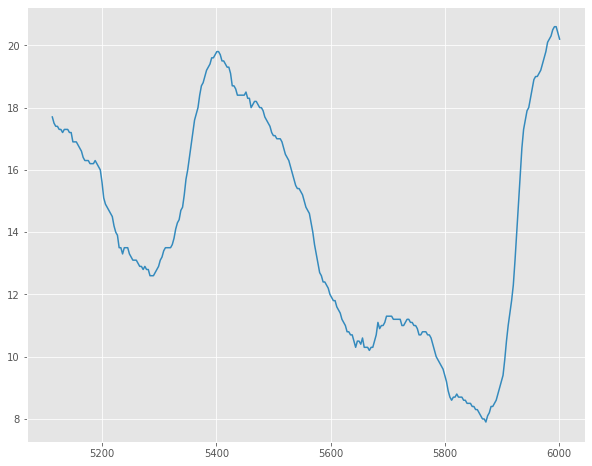

In [467]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD')

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could **show the time period** associated with the various unemployment rates for Spain? It might also be interesting to **compare** Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [468]:
ps = unemployment[(unemployment['country'].isin(['pt', 'es'])) &
                  (unemployment['seasonality'] == 'sa')]

For a quick tasks that involving replacing data values, use a dictionary where the old values are the keys and the new ones are the values.

In [469]:
#Initialize dictionary which we use to turn pt -> Portugal and es -> Spain
country_map = {"pt":"Portugal", "es":"Spain"}

ps["country"] = ps["country"].map(country_map)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Next, we'll **generate time series data** by converting our years and months into `datetime` objects. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime`. (Note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).) If we were interested in March 23, 1868, for example, we could do the following.

In [470]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. As a result, we pass in a valid string format.

In [471]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

Let's create the `datetime` object and add it to the `DataFrame` as a column named `date`. For this, we'll use the `DataFrame.insert()` method.

In [472]:
ps.insert(loc=0, column='date',
          value=pd.to_datetime(ps['year'].astype(str) + '/' + ps['month'].astype(str) + '/1'))

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`.

In [473]:
ps = ps[['date', 'country', 'unemployment_rate']]
ps.columns = ['Time Period', 'Country', 'Unemployment Rate']
ps = ps.pivot(index='Time Period', columns='Country', values='Unemployment Rate')
ps.tail()

Country,Portugal,Spain
Time Period,,
2010-08-01,11.1,20.5
2010-09-01,11.1,20.6
2010-10-01,11.0,20.6
2010-11-01,10.9,20.4
2010-12-01,10.9,20.2


In [474]:
ps.head()

Country,Portugal,Spain
Time Period,,
1983-01-01,7.5,NaN
1983-02-01,7.6,NaN
1983-03-01,7.7,NaN
1983-04-01,7.9,NaN
1983-05-01,8.0,NaN


Notice the indices.

<AxesSubplot:title={'center':'Unemployment Rate\n'}, xlabel='Time Period'>

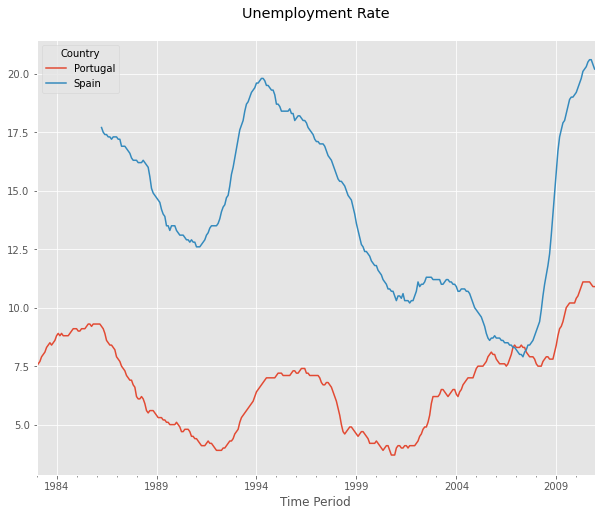

In [475]:
ps.plot(figsize=(10, 8), title='Unemployment Rate\n')